### 6.5 正規母集団と $\chi^2$ 分布

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.stats import chi2

#### 簡単なデモ

In [2]:
# 標準正規分布に従う標本を4点抽出
mu = 0
sigma = 1
df = 4
s = normal(mu, sigma, df)
s

array([0.01801246, 0.51859052, 0.47009636, 0.47005858])

In [3]:
# 4つの確率変数の2乗、それらの和を計算
print(s**2)
np.sum(s**2)

[0.00032445 0.26893613 0.22099059 0.22095507]


0.7112062357871151

In [4]:
# 上のプロセスを3000回繰り返し、ヒストグラムを作成
chi2_demo=[]
iteration = 3000
for k in range(iteration):
    chi2_demo.append(np.sum((normal(mu, sigma, df))**2))
chi2_demo[:10] # 10点表示

[6.744643181240153,
 1.7420369885529658,
 1.12797432348152,
 1.219867071423461,
 2.5086606379689615,
 6.901526547008565,
 0.5070549404340308,
 5.6124946290410085,
 2.8840034250863336,
 1.4621612487107576]

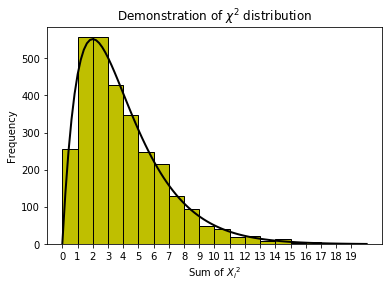

In [5]:
# グラフ描画
my_ticks = np.arange(0,20,1)
plt.xticks(my_ticks)
plt.title("Demonstration of $\chi^2$ distribution")
plt.xlabel("Sum of ${X_i}^2$")
plt.ylabel("Frequency")
plt.hist(chi2_demo, bins=my_ticks, color='y', ec='black')

x = np.linspace(0,20,100)
plt.plot(x, chi2.pdf(x, df)*iteration, color='k', lw=2);

In [6]:
# 平均と分散の計算（理論値：E(X)=n, V(x)=2*n）
print(f"平均 {np.mean(chi2_demo): 0.2f}")
print(f"分散 {np.var(chi2_demo, ddof=0): 0.2f}")

平均  3.98
分散  8.27


#### 自由度 $\nu = 1 \sim 7 $ の $\chi^2$ 分布の確率密度関数 (pdf)

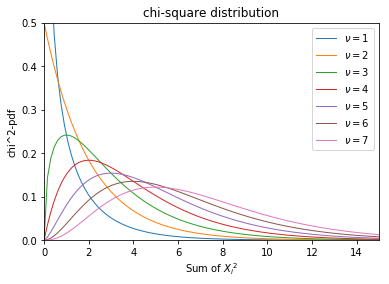

In [7]:
x = np.linspace(0,15,100)
for k in range(1,8):
    df = k
    label = r'$\nu =%.0f$' % df
    plt.plot(x, chi2.pdf(x, df), lw=1, label=label)

plt.axis([0,15, 0, 0.5])
plt.title("chi-square distribution")
plt.xlabel("Sum of ${X_i}^2$")
plt.ylabel("chi^2-pdf")
plt.legend();

### 6.5.2 $\chi^2$分布表の利用と、数表の意味（グラフ）

In [8]:
# chi-square分布表(p.93)の生成
# 自由度を設定
df = 9

alpha = [0.995, 0.975, 0.95, 0.9, 0.5, 0.25, 0.01, 0.005]
for k in alpha:
    print(f"{k:5.3f}  {chi2.isf(k, df, loc=0, scale=1):6.2f}")

0.995    1.73
0.975    2.70
0.950    3.33
0.900    4.17
0.500    8.34
0.250   11.39
0.010   21.67
0.005   23.59


In [9]:
# 数表の数値理解のためのグラフ描画
# 積分下限値 (z_pos)と、自由度を設定
z_pos = 12.59
df = 6

累積値： 0.0500


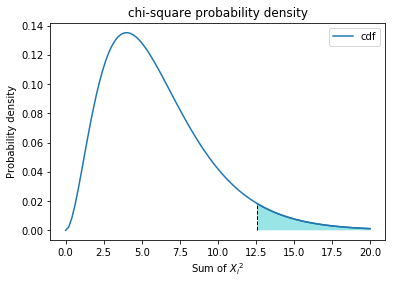

In [10]:
center = 0; sigma = 1

x1 = np.linspace(0, 20, 100)
y1 = chi2.pdf(x1, df, loc=center, scale=sigma)
x2 = np.linspace(z_pos, 20, 100)
y2 = chi2.pdf(x2, df, loc=center, scale=sigma)
plt.title("chi-square probability density")
plt.xlabel("Sum of ${X_i}^2$")
plt.ylabel("Probability density")
plt.plot(x1, y1, color="#1f77b4", label="cdf")
plt.plot(x2, y2, color="#1f77b4")
plt.fill_between(x2, 0, y2, facecolor='c', alpha=0.4)
plt.vlines(x=z_pos, ymin=0, ymax=chi2.pdf(z_pos,df, loc=center,scale=sigma),
           linestyles='dashed', linewidths=1)
plt.legend()

# 累積分布関数：Cumulative distribution function (cdf)
print(f"累積値： {chi2.sf(z_pos, df, loc=center, scale=sigma):6.4f}")